In [7]:
%pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/9.8 MB 1.3 MB/s eta 0:00:07
   ------ --------------------------------- 1.6/9.8 MB 1.6 MB/s eta 0:00:06
   ------- -------------------------------- 1.8/9.8 MB 1.7 MB/s eta 0:00:05
   ------- -------------------------------- 1.8/9.8 MB 1.7 MB/s eta 0:00:05
   ------- -------------------------------- 1.8/9.8 MB 1.7 MB/s eta 0:00:05
   -------- ------------------------------- 2.1/9.8 MB 1.2 MB/s eta 0:00:07
   -------- ------------------------------- 2.1/9.8 MB 1.2 MB/s eta 0:00:07
   ---------- ----------------------------- 2.6/9.8 MB 1.2 MB/s eta 0:00:07
   ------------- -------------------------- 3.4/9.8 MB 1.4 MB/s eta 0:00:05
   ----------------- -------------------


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.pylab import rcParams
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
data = pd.read_csv('Passageiros.csv')
data.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


Converter a coluna com dados temporais em índice

deduzir a data para colocar sempre o primeiro dia do mês

In [3]:
data['Month'] = pd.to_datetime(data['Month'], infer_datetime_format=True)
data = data.set_index(['Month'])
data.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Plotar o gráfico de número de passageiros

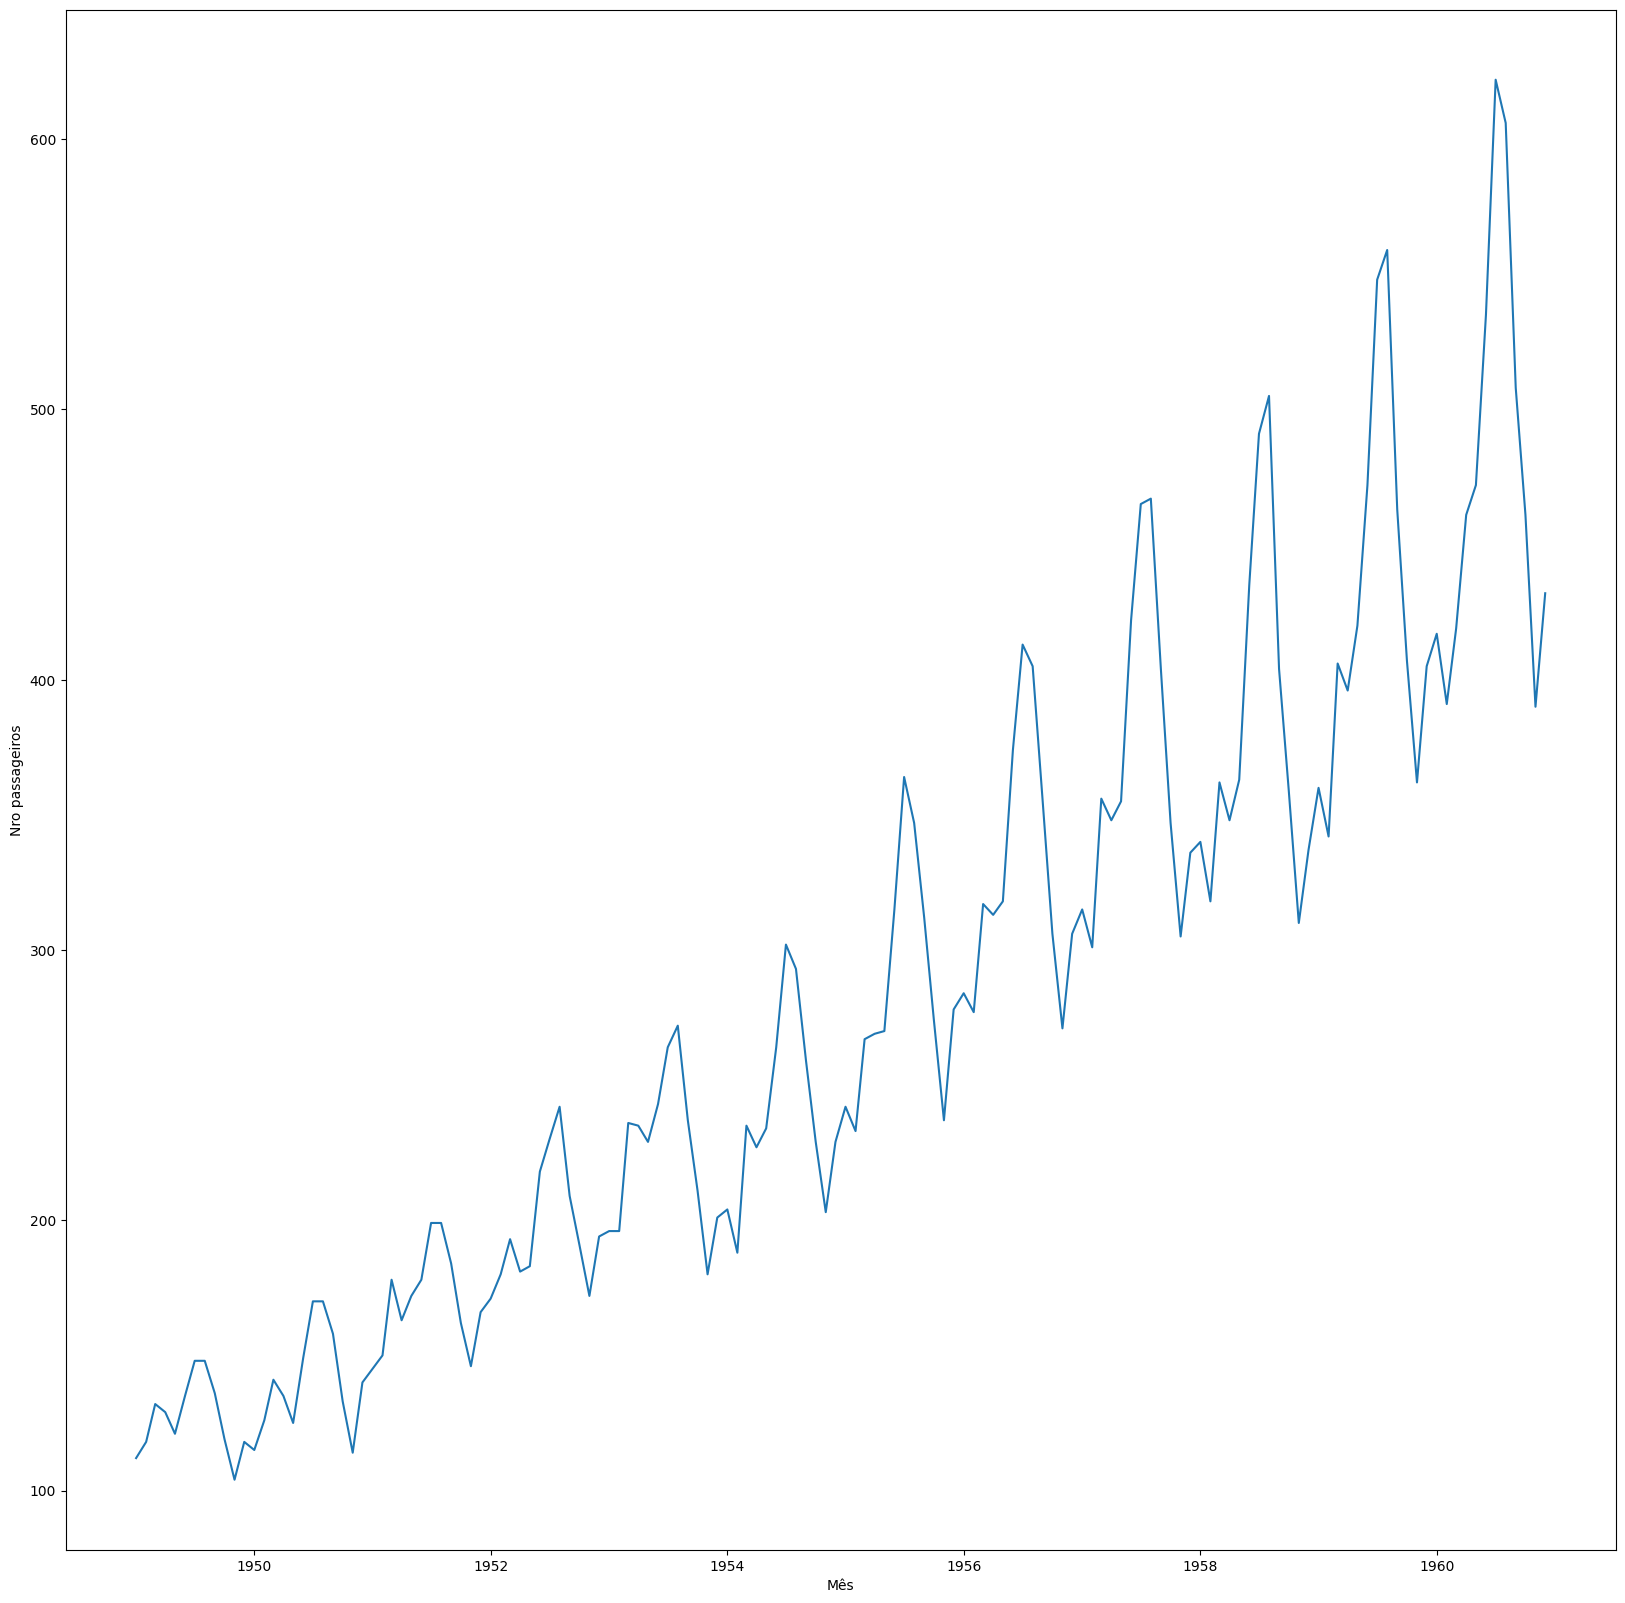

In [4]:
plt.figure(figsize=(20,20))
plt.xlabel('Mês')
plt.ylabel('Nro passageiros')
plt.plot(data)

In [ ]:
#Plotar o gráfico novamente, junto com a média móvel e o desvio padrão

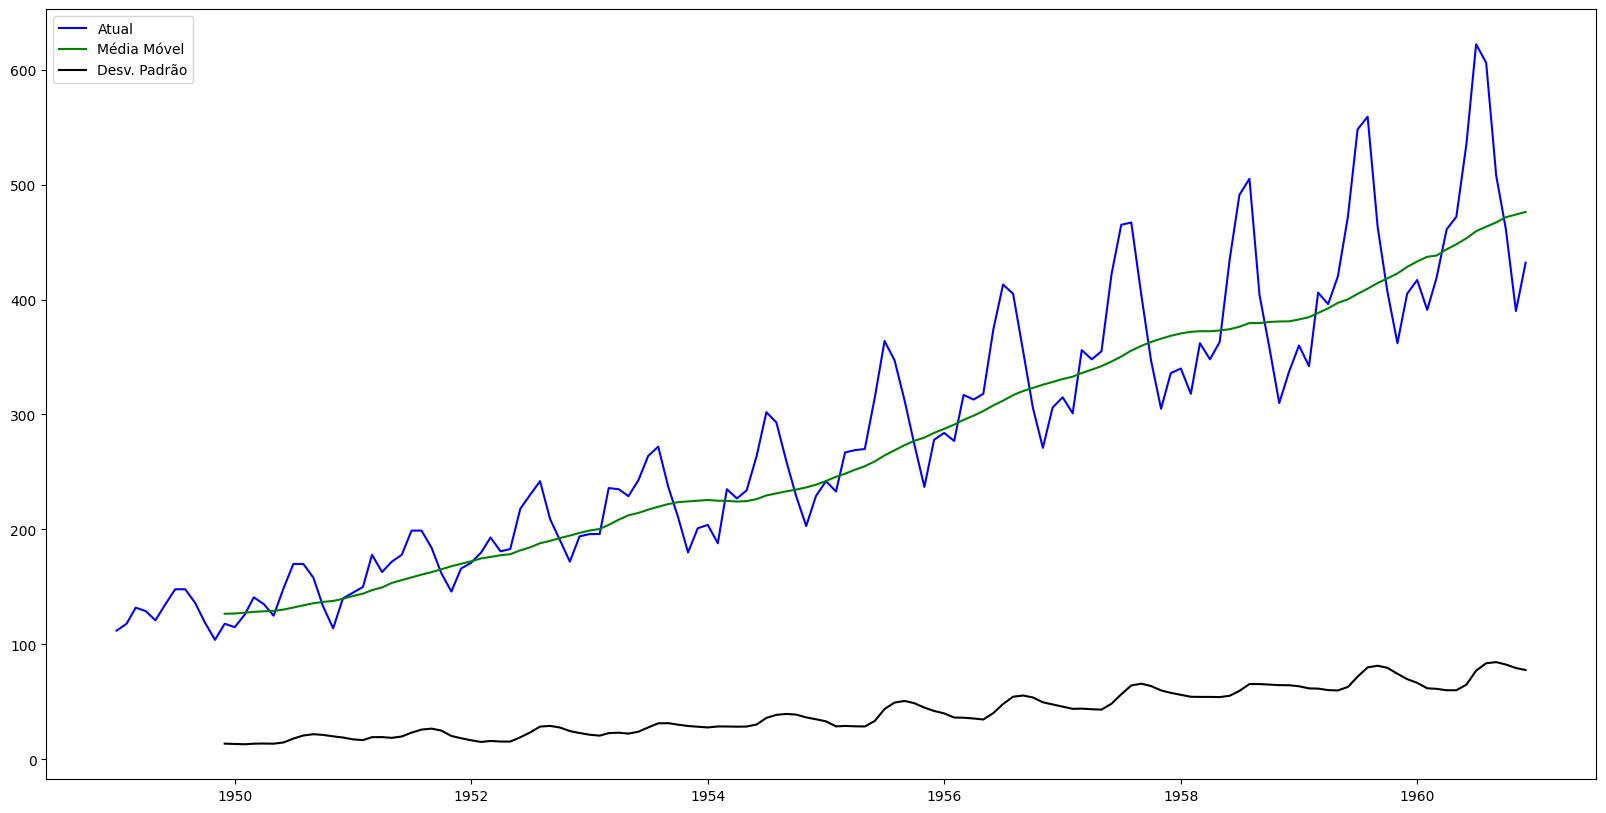

In [5]:
from pandas.core.window import Rolling
plt.figure(figsize=(20,10))
atual = plt.plot(data, color = 'blue', label = 'Atual')
dados_media_movel = data.rolling(window=12).mean()
dados_desv_padrao = data.rolling(window=12).std()
media_movel_gr = plt.plot(dados_media_movel, color = 'green', label = 'Média Móvel')
plt_desv_padrao_gr = plt.plot(dados_desv_padrao, color = 'black', label = 'Desv. Padrão')
plt.legend(loc='best')
plt.show(block = False)

verificar sazonalidade e tendência dos dados

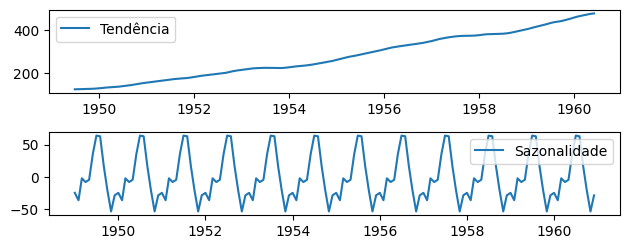

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(data)

trend = decomp.trend
seasonal = decomp.seasonal

plt.subplot(412)
plt.plot(trend, label = 'Tendência')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'Sazonalidade')
plt.legend(loc = 'best')
plt.tight_layout()